In [1]:
import pandas as pd
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import umap
from flot_util import *
from flot_visualization import *
from flot_prediction import *
from flot_feature_engineering import *
from flot_clustering import *

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r'C:\Users\rcpsi\OneDrive\Documents\langchain\Flotation\dados\Flotacao_Dados_Final.csv',sep=';')

## Data cleaning

In [3]:
df = parse_time(df)
df = remove_missing(df)
df = filter_by_ph(df, threshold=6)
#df = filter_by_flow(df)
df_clean = drop_consecutive_duplicates_tolerance(df)

#df_clean = add_time_features(df_clean)
#df_clean = add_ph_features(df_clean)
#df_clean = add_dosage_flow_features(df_clean)
#df_clean = add_cell_level_stats(df_clean)
#df_clean = add_rolling_features(df_clean)
#df_clean = add_lag_silica_features(df_clean)
#df_clean = add_previous_changes(df_clean)
#df_clean = add_lags(df_clean)

#df_clean = add_delta_silica_regular(df_clean)
#df_clean = filter_by_date_range(df_clean, '2024-07-18', '2024-10-20')

In [4]:
list(df.columns)

['inicio',
 'fim',
 'conc_silica',
 'conc_fe',
 'param_dosagem_amido',
 'dosagem_amina_conc_magnetica',
 'ph_flotacao_linha01',
 'ph_flotacao_linha02',
 'densidade_alimentacao_flotacao',
 'nivel_celula_li640101',
 'TO_LI6401_02',
 'nivel_celula_li640201',
 'nivel_celula_li640202',
 'nivel_celula_li641101',
 'nivel_celula_li641102',
 'nivel_celula_li641201',
 'nivel_celula_li641202',
 'nivel_celula_li642101',
 'nivel_celula_li642201',
 'nivel_celula_li643101',
 'nivel_celula_li643201',
 'vazao_alimentacao_flotacao',
 'operacao',
 'duration_min']

In [ ]:
features = df_clean.columns.tolist()
drops = ['fim','conc_fe', 'operacao','duration_min']
target = ['conc_silica']    

features = list(set(features) - set(drops))
features = list(set(features) - set(target))
features = list(set(features) - set(['inicio']))

print(df_clean.shape)
df_clean.dropna(inplace=True)
print(df_clean.shape)
df_clean.drop(columns=drops, inplace=True)

(2620, 24)
(2620, 24)


In [6]:
df_clean.shape

(2620, 15)

In [7]:
df_clean.head()

,inicio,conc_silica,nivel_celula_li640101,TO_LI6401_02,nivel_celula_li640201,nivel_celula_li640202,nivel_celula_li641101,nivel_celula_li641102,nivel_celula_li641201,nivel_celula_li641202,nivel_celula_li642101,nivel_celula_li642201,nivel_celula_li643101,nivel_celula_li643201,vazao_alimentacao_flotacao
0,2024-02-27 00:00:00,2.72,369.44,370.33,373.06,370.58,349.14,350.88,344.09,349.76,360.64,359.21,360.89,328.20,907.14
1,2024-02-27 01:00:00,1.23,369.84,373.12,372.14,374.64,353.68,353.15,340.23,342.37,360.43,348.20,361.36,332.58,677.98
2,2024-02-27 03:00:00,1.93,368.38,371.37,368.52,369.66,351.30,352.21,346.62,347.69,360.32,365.79,360.09,340.50,848.19
3,2024-02-27 05:00:00,2.04,369.72,369.53,368.99,368.71,349.17,350.05,338.10,341.43,358.81,362.28,359.22,365.90,873.97
4,2024-02-27 07:00:00,4.56,370.38,364.81,368.49,365.44,340.96,345.31,358.72,347.50,356.60,355.33,356.71,333.77,922.34


## Exploratory data analysis

In [8]:
plot_time_series_with_gaps(df_clean,'inicio','conc_silica')

In [9]:
# Usage examples:
plot_histogram(df_clean, 'conc_silica')
# plot_scatter(df_clean, 'vazao_alimentacao_flotacao', 'conc_silica')
# plot_pairwise(df_clean, ['conc_silica', 'conc_fe', 'dosagem_amina_conc_magnetica', 'vazao_alimentacao_flotacao'])

In [10]:
df_clean.drop(columns=['inicio'], inplace=True)

In [12]:
#plot_scatter(df_clean, 'ph_flotacao_linha01', 'conc_silica')

In [13]:
plot_scatter(df_clean, 'vazao_alimentacao_flotacao', 'conc_silica')

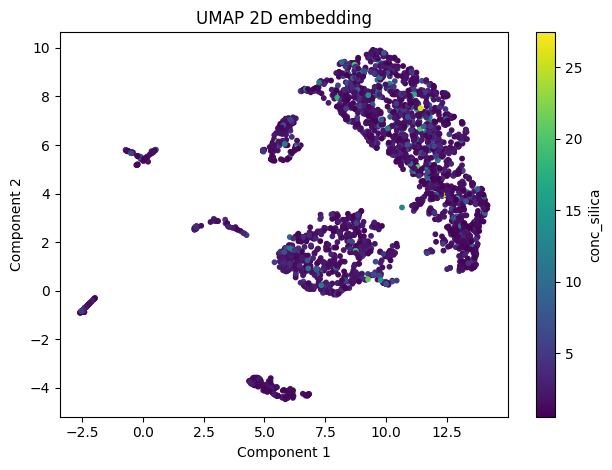

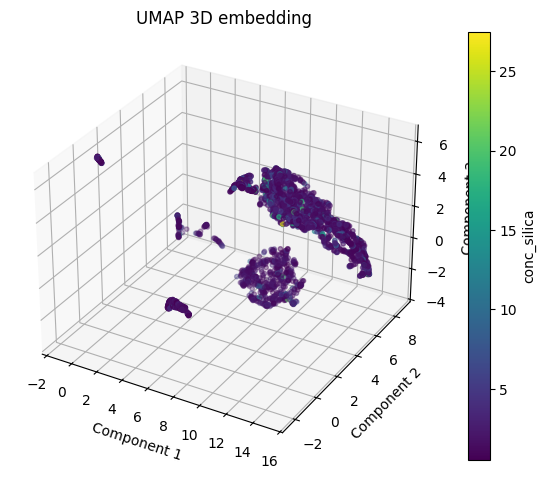

In [14]:
embedding_visualization(
    df_clean,
    source_col='conc_silica',
    methods=['umap'],  # or any subset
)

In [15]:
emb2 = compute_umap(df_clean[features].values, n_components=2, random_state=42)

stats, labels = characterize_embedding_clusters(
    df_clean, emb2, source_col='conc_silica',
     method='kmeans', n_clusters=6
)
print(stats)

importances = cluster_feature_importance(df_clean, labels, source_col='conc_silica')
print(importances)

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run


        nivel_celula_li640101                                  TO_LI6401_02  \
                        count        mean         std   median        count   
cluster                                                                       
0                         715  364.986140   18.646961  369.650          715   
1                         632  367.074462   11.916699  369.615          632   
2                         603  359.609469   20.890013  360.790          603   
3                         165  250.222182  137.888587  316.830          165   
4                         355  365.679662   23.814118  369.570          355   
5                         150  353.078400   38.832557  359.865          150   

                                        nivel_celula_li640201              \
               mean         std  median                 count        mean   
cluster                                                                     
0        347.565664   34.201131  361.44                  

In [16]:
stats

nivel_celula_li640101                                  TO_LI6401_02  \
                        count        mean         std   median        count   
cluster                                                                       
0                         715  364.986140   18.646961  369.650          715   
1                         632  367.074462   11.916699  369.615          632   
2                         603  359.609469   20.890013  360.790          603   
3                         165  250.222182  137.888587  316.830          165   
4                         355  365.679662   23.814118  369.570          355   
5                         150  353.078400   38.832557  359.865          150   

                                        nivel_celula_li640201              \
               mean         std  median                 count        mean   
cluster                                                                     
0        347.565664   34.201131  361.44                   715  346.850238   
1        365.915934   22.097905  369.36                   632  365.745997   
2        344.527629   39.541180  359.37                   603  343.771211   
3        270.844364  116.179726  266.54                   165  169.002848   
4        344.537577   45.903498  363.46                   355  351.905746   
5        352.964933   30.349808  359.61                   150  344.530800   

         ... nivel_celula_li643101         nivel_celula_li643201              \
         ...                   std  median                 count        mean   
cluster  ...                                                                   
0        ...             37.780925  359.44                   715  240.420070   
1        ...             34.937077  358.43                   632  298.787184   
2        ...             52.701760  355.37                   603  265.075191   
3        ...            162.887488  107.49                   165  111.136606   
4        ...             52.423845  331.66                   355  292.498648   
5        ...             55.548743  349.22                   150  308.539600   

                            vazao_alimentacao_flotacao              \
                std  median                      count        mean   
cluster                                                              
0         80.959465  248.68                        715  697.970923   
1         52.233308  299.65                        632  951.108687   
2         64.235894  273.94                        603  742.914129   
3        141.150220   16.92                        165  504.599758   
4         63.804291  298.79                        355  773.575718   
5         45.658547  317.55                        150  763.509333   

                              
                std   median  
cluster                       
0         89.928684  704.360  
1         94.553045  931.625  
2        158.905240  750.500  
3        243.221554  507.640  
4        117.284149  771.880  
5        139.682259  766.390  

[6 rows x 52 columns]

In [17]:
importances

nivel_celula_li641202         0.273366
vazao_alimentacao_flotacao    0.220193
nivel_celula_li641102         0.133249
nivel_celula_li641201         0.057547
nivel_celula_li643201         0.050658
nivel_celula_li642201         0.049207
nivel_celula_li640202         0.041479
nivel_celula_li643101         0.035136
nivel_celula_li640101         0.032043
nivel_celula_li640201         0.030551
nivel_celula_li642101         0.029080
nivel_celula_li641101         0.024942
TO_LI6401_02                  0.022548
dtype: float64

## Prediction

In [18]:
df_clean.columns

Index(['conc_silica', 'nivel_celula_li640101', 'TO_LI6401_02',
       'nivel_celula_li640201', 'nivel_celula_li640202',
       'nivel_celula_li641101', 'nivel_celula_li641102',
       'nivel_celula_li641201', 'nivel_celula_li641202',
       'nivel_celula_li642101', 'nivel_celula_li642201',
       'nivel_celula_li643101', 'nivel_celula_li643201',
       'vazao_alimentacao_flotacao'],
      dtype='object')

In [19]:
res = evaluate_models(df_clean, features, target=target[0], show_residuals=False)
res

,model,MAE,RMSE,R2,MAPE (%)
0,LinearRegression,1.720801,2.856925,0.030445,77.854091
1,RandomForest,1.716977,2.849321,0.035598,77.647510
2,XGBoost,1.816884,3.011107,-0.077029,81.601215


In [ ]:
#res_weights = evaluate_models_weights(df_clean, features, target=target[0])
#res_weights

In [ ]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.9)
#res_q

In [ ]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.95)
#res_q

In [ ]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.5)
#res_q

In [ ]:
#res_tweedie = evaluate_tweedie_models(df_clean, features, target=target[0], power=1.5,show_residuals=True)
#res_tweedie